#### Evaluating the model

## What is ROC and AUC?

**ROC Curve:** It’s a plot of True Positive Rate (TPR) vs False Positive Rate (FPR) at various threshold settings.

TPR (Recall) = TP / (TP + FN)

FPR = FP / (FP + TN)

**AUC (Area Under the Curve):** It tells how much the model is capable of distinguishing between classes.

AUC = 1: Perfect classifier

AUC = 0.5: No discrimination (random guessing)

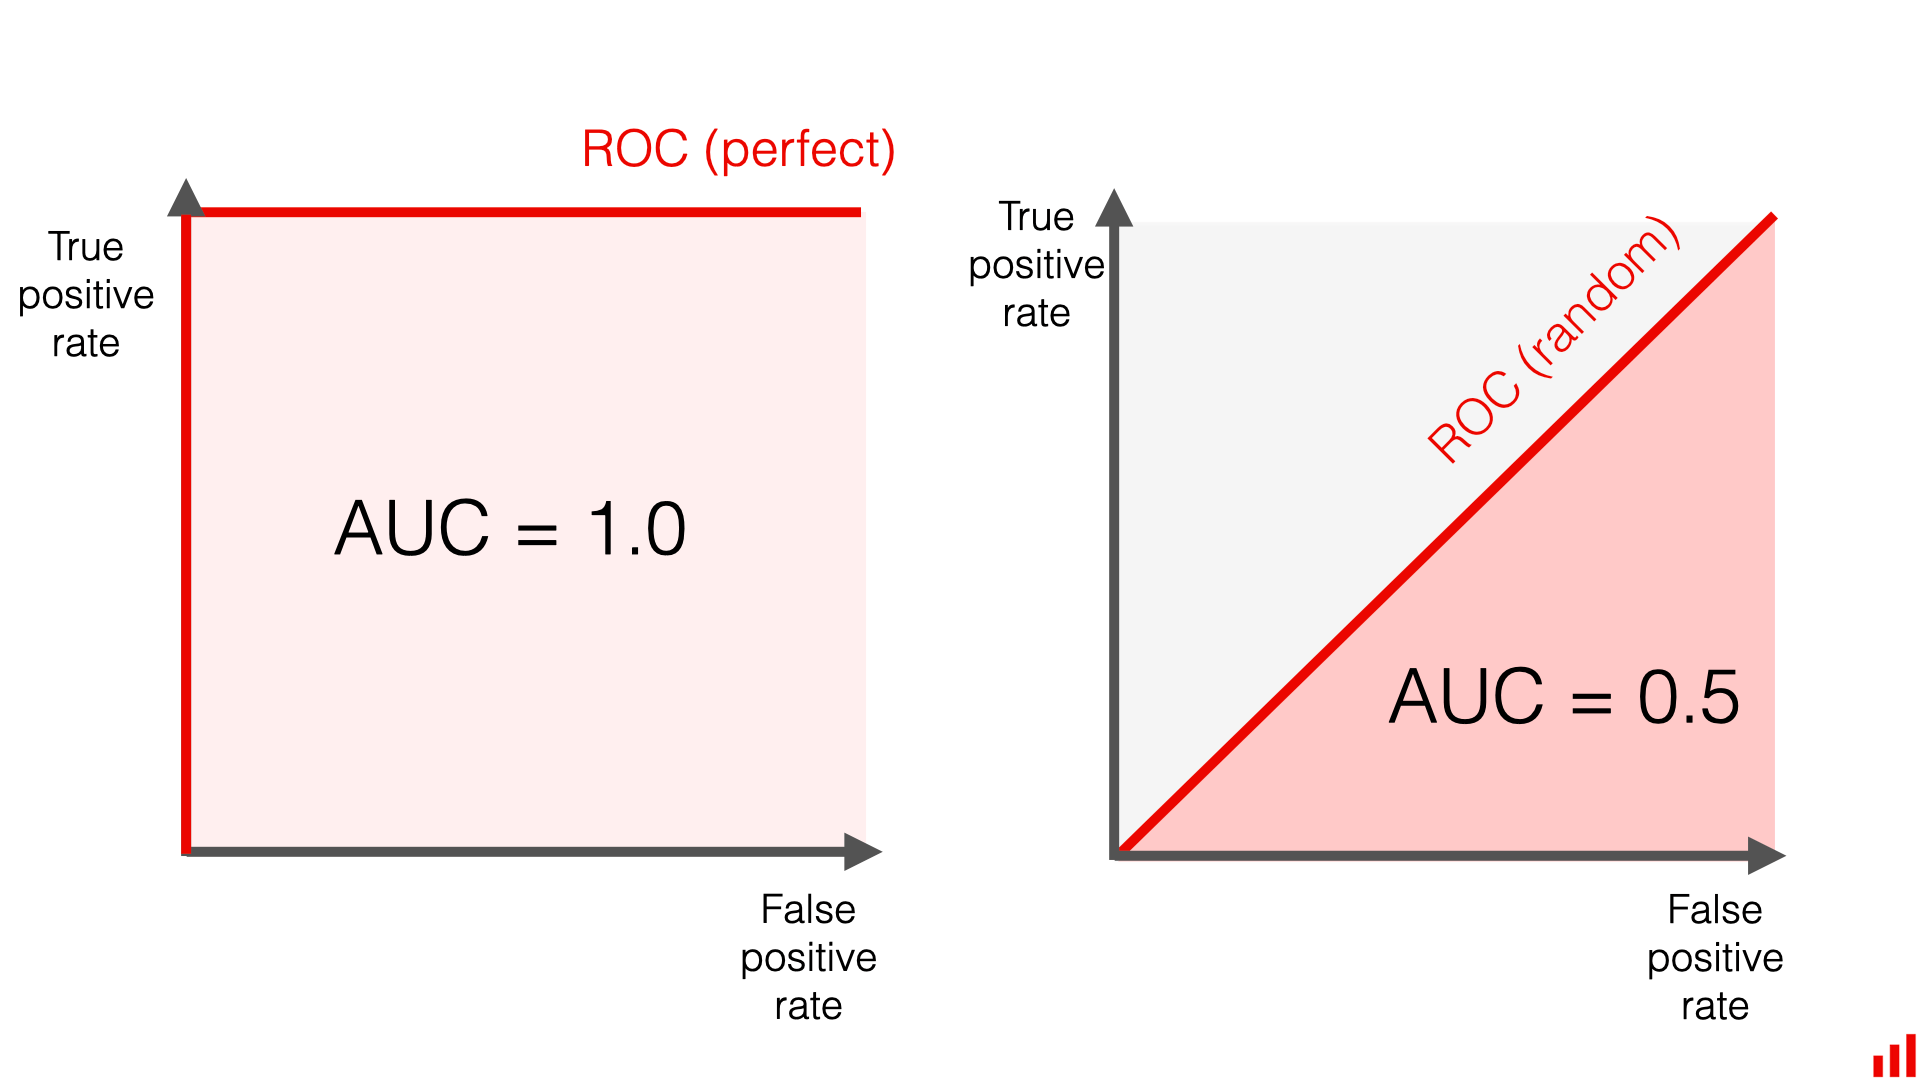

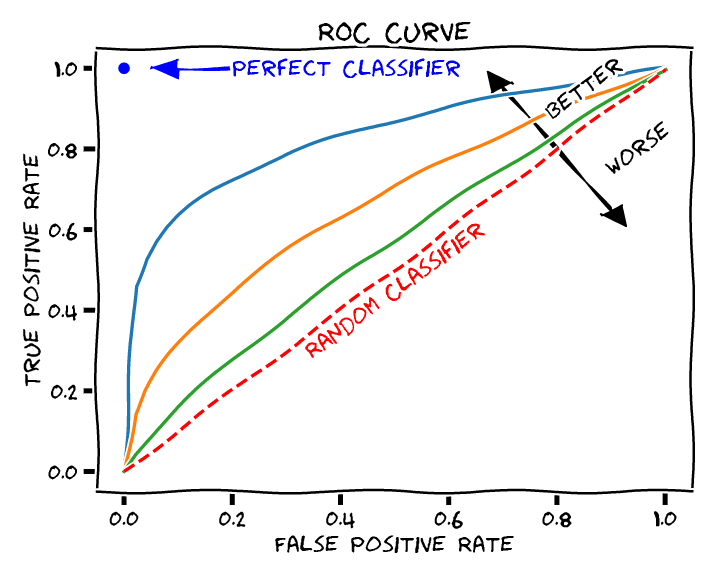

## Step 1: Load and Preprocess Titanic Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load dataset
df = sns.load_dataset('titanic')

# Select features and drop rows with missing important values
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']].dropna()

# Convert categorical to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Define features and target
X = df.drop('survived', axis=1)
y = df['survived']


## Step 2: Train-Test Split + Scaling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Step 3: Train Multiple Models


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM (probability)": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}


## Step 4: Compute ROC & AUC and Plot

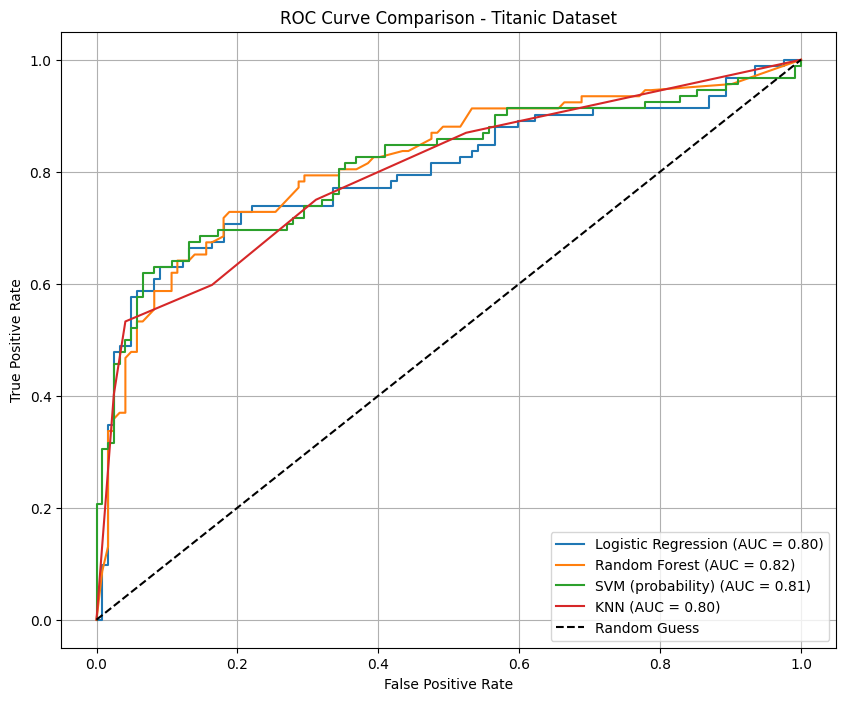

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Fit
    model.fit(X_train_scaled, y_train)

    # Predict probabilities for class 1 (survived)
    y_probs = model.predict_proba(X_test_scaled)[:, 1]

    # ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot random line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Final plot setup
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Titanic Dataset")
plt.legend(loc="lower right")
plt.grid()
plt.show()


## Step 5: Interpretation

Closer to top-left = Better performance

AUC Score near 1.0: Excellent model

AUC ~0.5: Useless (like guessing)

## Multiclass Confusion Matrix


## Step 1: Load Data & Split


In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Step 2: Train Two Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

## Step 3: Multiclass Confusion Matrix & Accuracy

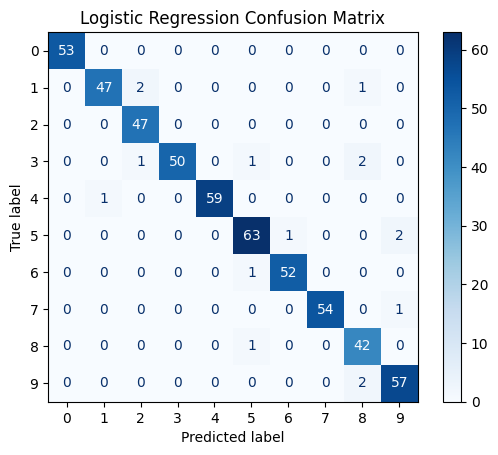

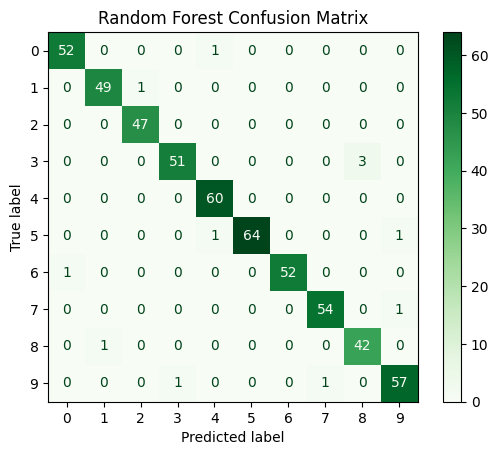

Logistic Regression Accuracy: 0.9703703703703703
Random Forest Accuracy: 0.9777777777777777


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm_log, display_labels=digits.target_names).plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=digits.target_names).plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Accuracy comparison
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

## How to Interpret a Multiclass Confusion Matrix (10 classes)?

Diagonal cells = correct predictions

Off-diagonal cells = misclassifications

Look at which digits are confused most (e.g., 4s predicted as 5s)

## Advanced Evaluation

- **Precision** = What % of predicted positives were *actually* positive?  
  > *"How accurate are my positive predictions?"*

- **Recall** = What % of actual positives were correctly predicted?  
  > *"How well did I find all the real positives?"*

- **F1 Score** = The balance between precision and recall (harmonic mean).  
  > *"How good is the model overall at finding positives accurately?"*

### Formulae:
- Precision = TP / (TP + FP)  
- Recall = TP / (TP + FN)  
- F1 Score = 2 × (Precision × Recall) / (Precision + Recall)

Where:
- TP = True Positives  
- FP = False Positives  
- FN = False Negatives

In [ ]:
from sklearn.metrics import classification_report

print("Logistic Regression:")
print(classification_report(y_test, y_pred_log, target_names=digits.target_names.astype(str)))

print("Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=digits.target_names.astype(str)))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.94      0.96        50
           2       0.94      1.00      0.97        47
           3       1.00      0.93      0.96        54
           4       1.00      0.98      0.99        60
           5       0.95      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.89      0.98      0.93        43
           9       0.95      0.97      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.0

## Final Verdict
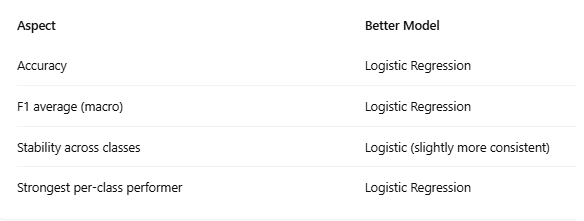

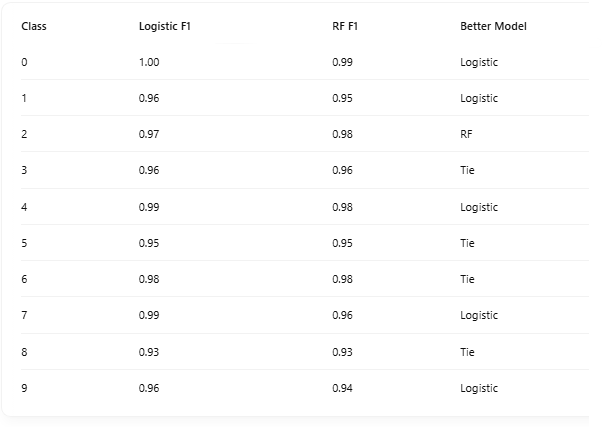

## Regression

In [ ]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [ ]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the data
data = fetch_california_housing()
X, y = data.data, data.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression
<p align="center">
<img src="https://cdn.nextjournal.com/data/QmfPuPp4V74FyvTTojMj6ix9T8Skj1ji4GhX5Pr6zK8w4N?filename=linear-regression.png&content-type=image/png" width="500"
</p>

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

#### Evaluating the model

In [ ]:
regr.score(X_test, y_test)

0.5757877060324524

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(regr.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(regr.score(X_test, y_test)))

The Training accuracy of the model is 0.61
The Testing accuracy of the model is 0.58


In [ ]:
predictions = regr.predict(X_test)
print(predictions)

[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]


In [ ]:
print("The coefficients of the function are {}".format(regr.coef_))
print("The intercept of the function is {}".format(regr.intercept_))

The coefficients of the function are [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
The intercept of the function is -37.02327770606391


## Regressions Metrics


**R² Score (R-squared)**

Measures how well the model explains the variation in the target variable.

Value ranges from 0 to 1 (can be negative if really bad).

1 = perfect prediction, 0 = predicts mean, <0 = worse than mean

"How well does the model fit the data?"




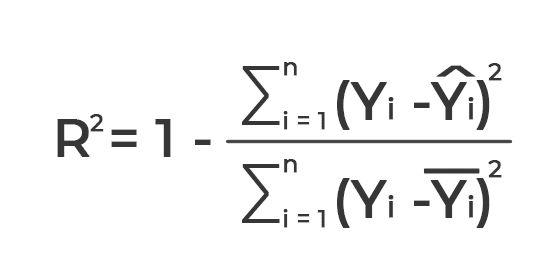

**MSE (Mean Squared Error)**

Measures the average of squared prediction errors.

Lower is better (closer to 0).

Sensitive to large errors (since errors are squared).

"How far off are my predictions on average?"

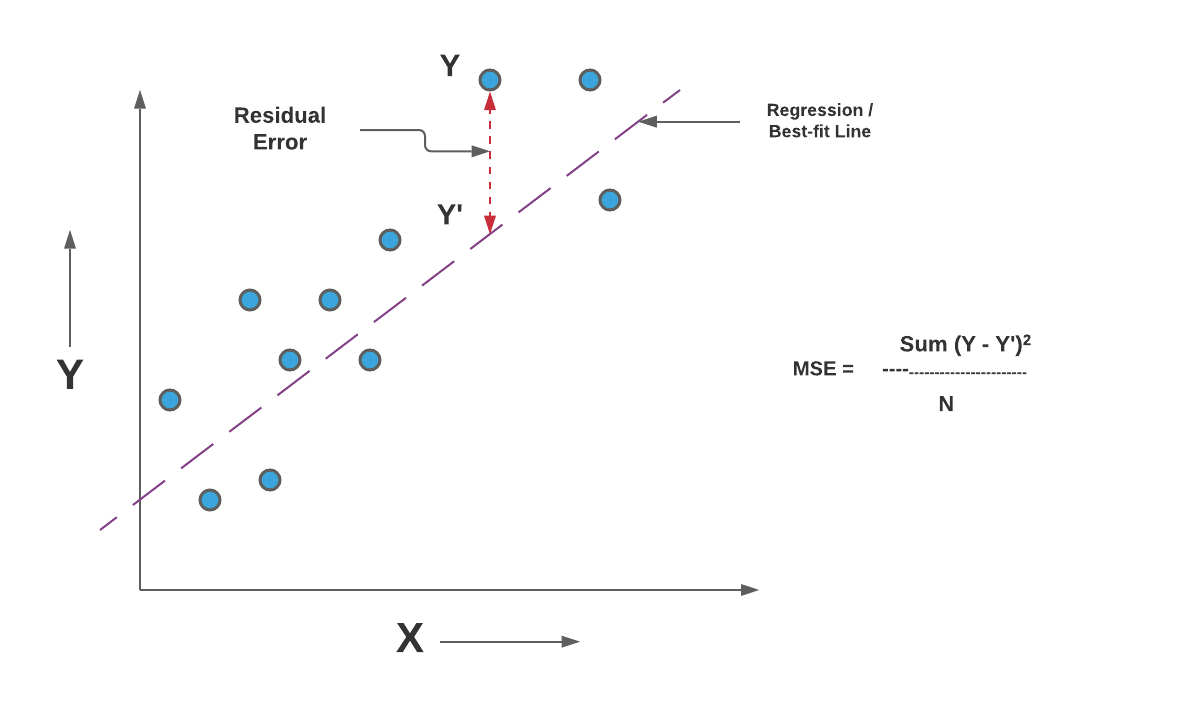

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have actual y_test and predicted values in predictions
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


R² Score: 0.5758
Mean Squared Error: 0.5559


# Unsupervised Learning (clustering)

In [ ]:
from sklearn.datasets import load_iris

# Load the data
iris_data = load_iris()

In [ ]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris_data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
print(iris_data["feature_names"])
iris_data["data"][:10]

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

### KMeans Clustering
<p align="center">
<img src="https://storage.googleapis.com/aihub-c2t-containers-public/release-0.2.0/kfp-components/oob_algorithm/kmeans/assets/kmeans.png" width="800"
</p>

In [ ]:
iris_data.data.shape

(150, 4)

In [ ]:
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=3, random_state=10)
kms.fit(iris_data.data)

KMeans(n_clusters=3, random_state=10)

#### Evaluating the model

In [ ]:
kms.cluster_centers_

array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [ ]:
predictions=kms.labels_
print("Prediction for the KMeans Cluster")
print(predictions)

Prediction for the KMeans Cluster
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [ ]:
print(iris_data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
def transform(x):
  if x==0:
    return 1
  elif x==1:
    return 0
  else:
    return 2
predictions_2=np.array(list((map(transform,predictions)) ) )
print("Prediction for the KMeans Cluster")
print(predictions_2)

Prediction for the KMeans Cluster
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [ ]:
print("Actual Labels")
print(iris_data["target"])

Actual Levels
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
pd.crosstab(predictions_2, iris_data.target)

col_0,0,1,2
row_0,,,
0,50,0,0
1,0,3,36
2,0,47,14


In [ ]:
print("Performance of the KMeans Cluster {:.2f}".format(np.mean(predictions_2==iris_data.target)))

Performance of the KMeans Cluster 0.45
